# Explore News Sentiments

In [156]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Imports

In [264]:
import os
import warnings

# Import necessary libraries
import numpy as numpy
import pandas as pd
from data.load_data import load_local_data
from eda.data_quality_utils import DataQualityUtils
from eda.textual_eda import TextualEDA
from eda.visualizer import DataVisualizer
from eda.topic_modeler import TopicModeler
from eda.time_series_analyzer import TimeSeriesAnalyzer
from eda.publisher_analyzer import PublisherAnalyzer

In [265]:
warnings.filterwarnings("ignore", category=FutureWarning)

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [223]:
# Load the stock news sentiment data
df = load_local_data("../raw/raw_analyst_ratings.csv")
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/raw_analyst_ratings.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (1407328, 6)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## Inspecting Dataset

In [224]:
#view sample data
df.sample(10)

,Unnamed: 0,headline,url,publisher,date,stock
441027,443365,Eaton Raises Qtr. Dividend from $0.38 to $0.42...,https://www.benzinga.com/news/13/02/3372050/ea...,Paul Quintaro,2013-02-27 00:00:00,ETN
758176,762050,Linn Energy Reports Q4 EPS $0.51 vs $0.51 Est,https://www.benzinga.com/news/earnings/12/02/2...,Matthew Kennedy,2012-02-23 00:00:00,LINE
1346259,1352638,What to Expect From Bank Earnings,https://www.benzinga.com/news/earnings/12/01/2...,Minyanville,2012-01-10 00:00:00,WFC
385366,387444,UPDATE: Wunderlich Securities Raises PT to $60...,https://www.benzinga.com/analyst-ratings/analy...,Joe Young,2011-11-07 00:00:00,DTV
921472,926223,Four Stocks Far Below Their 50 Day Moving Average,https://www.benzinga.com/trading-ideas/technic...,Tim Parker,2013-10-30 00:00:00,NUAN
136984,137979,Deutsche Bank Upgrades Basic Energy Services t...,https://www.benzinga.com/news/17/01/8921460/de...,Paul Quintaro,2017-01-19 00:00:00,BAS
1170027,1175717,"Morgan Stanley Maintains SPX at Overweight, Ra...",https://www.benzinga.com/analyst-ratings/price...,Juan Lopez,2012-09-17 00:00:00,SPW
973812,978718,"Stocks To Watch For January 7, 2014",https://www.benzinga.com/news/earnings/14/01/4...,Monica Gerson,2014-01-07 00:00:00,PANW
395841,398007,Morgan Stanley Maintains Underweight on Brinke...,https://www.benzinga.com/news/20/06/16158238/m...,Rich Worthington,2020-06-02 08:00:11-04:00,EAT
1093965,1099398,"Roper Industries, Inc. Reports Q1 EPS of $1.27...",https://www.benzinga.com/news/earnings/13/04/3...,Paul Quintaro,2013-04-29 00:00:00,ROP


In [225]:
#see the last rows
df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [226]:
#shape of the dataset
df.shape

(1407328, 6)

In [227]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [228]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1407328.0,707245.39645,408100.91044,0.0,353812.75,707239.5,1060710.25,1413848.0


In [229]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
headline,1407328,845770,Benzinga's Top Upgrades,5449
url,1407328,883429,https://www.benzinga.com/news/20/03/15538835/s...,1704
publisher,1407328,1034,Paul Quintaro,228373
date,1407328,39957,2020-03-12 00:00:00,1766
stock,1407328,6204,MRK,3333


In [230]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [231]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Unnamed: 0    1407328
url            883429
headline       845770
date            39957
stock            6204
publisher        1034
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [232]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [233]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Unnamed: 0,0,0.00%
headline,0,0.00%
url,0,0.00%
publisher,0,0.00%
date,0,0.00%
stock,0,0.00%


### Missing Values

In [234]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [235]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [236]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [237]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [238]:
#drop redundancies and clean column names
df=dq.clean_dataframe()

In [239]:
df=dq.convert_columns_to_datetime()

[date] Converted: 55987/1407328 (1351341 became NaT)


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype              
---  ------     --------------    -----              
 0   headline   1407328 non-null  object             
 1   url        1407328 non-null  object             
 2   publisher  1407328 non-null  object             
 3   date       55987 non-null    datetime64[ns, UTC]
 4   stock      1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 53.7+ MB


In [241]:
df.columns

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [262]:
df.sample(10)

,headline,url,publisher,date,stock
304217,Top 4 Mid-Cap Stocks In The Property Managemen...,https://www.benzinga.com/trading-ideas/14/08/4...,Monica Gerson,NaT,CSGP
967017,"10 Stocks To Watch For August 1, 2017",https://www.benzinga.com/news/earnings/17/08/9...,Lisa Levin,NaT,P
86200,Hearing an Apollo-Led PE Deal to Purchase Angl...,https://www.benzinga.com/news/16/11/8667119/he...,Paul Quintaro,NaT,APO
319628,Regeneron Pharmaceuticals: Sequencing Its Way ...,https://www.benzinga.com/general/biotech/18/05...,Andy Pai,NaT,CVS
165463,"Earnings Scheduled For November 26, 2018",https://www.benzinga.com/news/earnings/18/11/1...,Lisa Levin,NaT,BKE
564582,"UBS Upgrades Barrick Gold to Buy, Announces $2...",https://www.benzinga.com/news/20/03/15546313/u...,Vick Meyer,NaT,GOLD
185042,Top 4 NYSE Stocks In The Meat Products Industr...,https://www.benzinga.com/trading-ideas/13/01/3...,Monica Gerson,NaT,BRFS
1007949,'PerkinElmer Receives AOAC INTERNATIONAL First...,https://www.benzinga.com/press-releases/20/05/...,Benzinga Newsdesk,2020-05-11 13:11:24+00:00,PKI
1348155,BMO Capital Upgrades Weatherford International...,https://www.benzinga.com/news/13/10/3995391/bm...,Paul Quintaro,NaT,WFT
1337932,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/05/15979139/s...,Benzinga Newsdesk,NaT,WDAY


In [245]:
# Save to csv
df.to_csv("../../data/interim/cleaned_analyst_ratings", index=False)

In [180]:
# Initialize the EDA class

eda = TextualEDA(df, source_col="publisher")

In [215]:
# Headline length statistics
print("Headline Length Stats:")
print(eda.headline_length_stats())

Headline Length Stats:
count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


In [182]:
viz = DataVisualizer(df)

In [183]:
# Articles per publisher
print("\nArticles per Publisher:")
print(eda.articles_per_publisher()) 


Articles per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


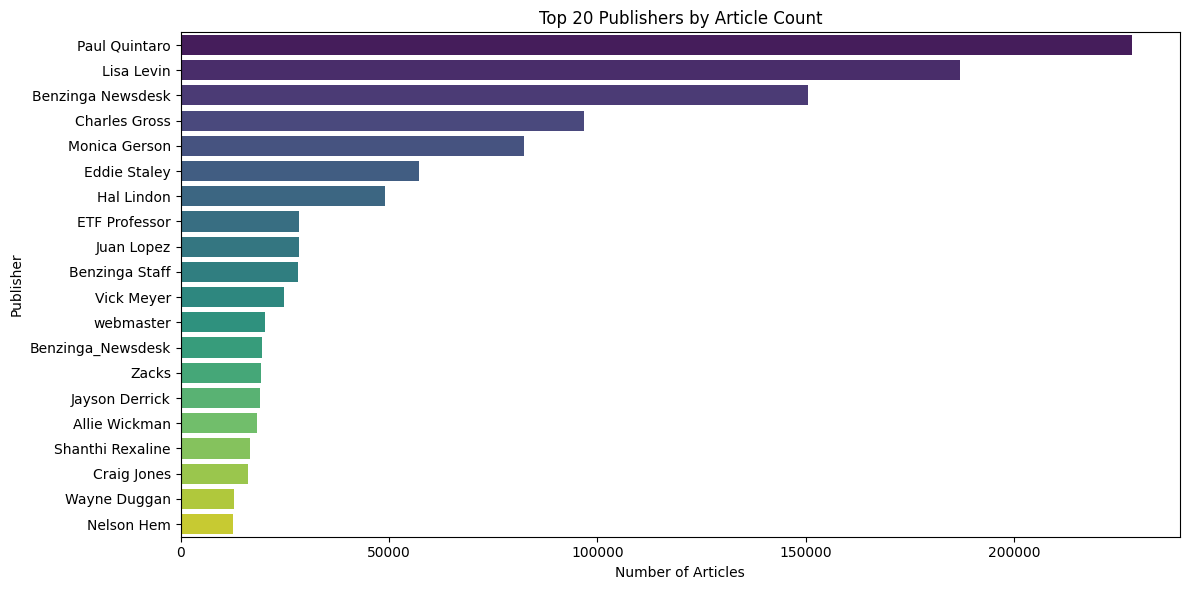

In [184]:
viz.plot_articles_per_publisher()

In [185]:
print("\nWeekday Distribution:")
print(eda.weekday_distribution())


Weekday Distribution:
date
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


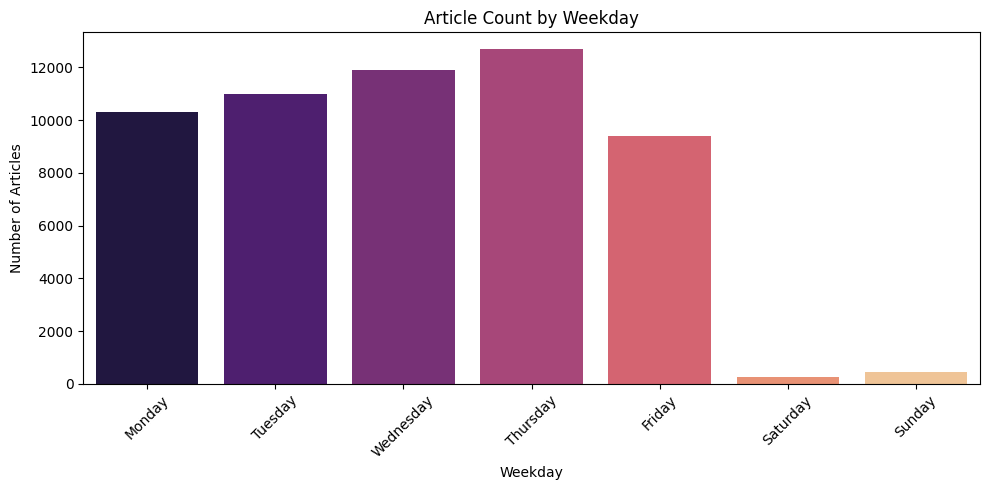

In [186]:
viz.plot_weekday_distribution()

In [187]:
# Publication trends
daily_counts, weekday_distribution = eda.publication_trends()
print("\nDaily Article Counts:")
print(daily_counts.tail())


Daily Article Counts:
date
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, dtype: int64


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64


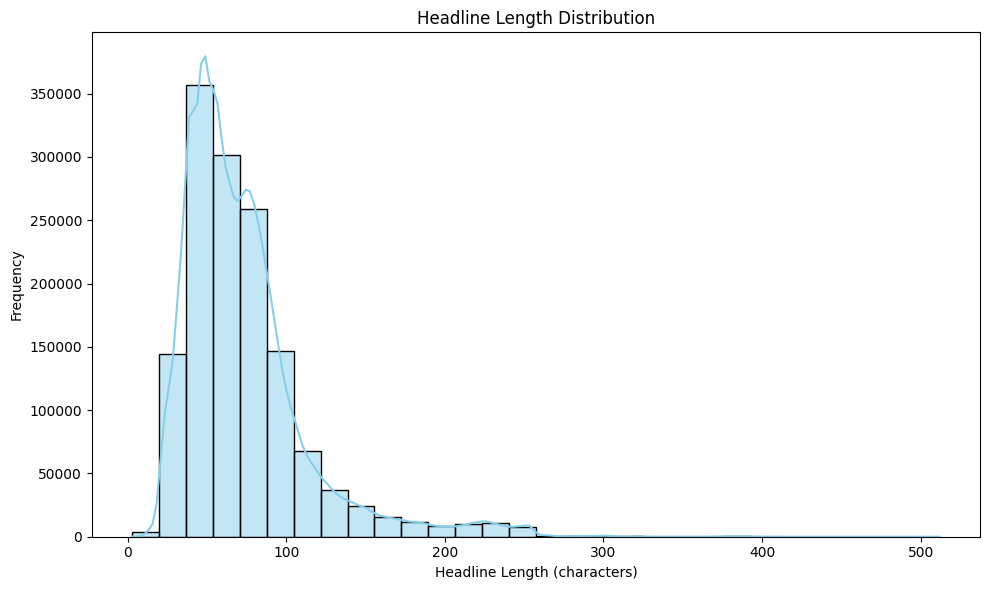

In [188]:
viz.plot_headline_length_distribution()

Top Keywords per Topic:
Topic 1: stocks, trading, shares, new, says, set, higher, industry, companies, lower
Topic 2: downgrades, upgrades, benzingas, pt, buy, target, maintains, price, raises, neutral
Topic 3: vs, est, eps, reports, sales, estimate, q4, q1, q2, q3
Topic 4: earnings, 52week, stocks, hit, highs, scheduled, lows, market, update, markets
Topic 5: session, stocks, moving, premarket, biggest, movers, midday, benzingas, losers, watch


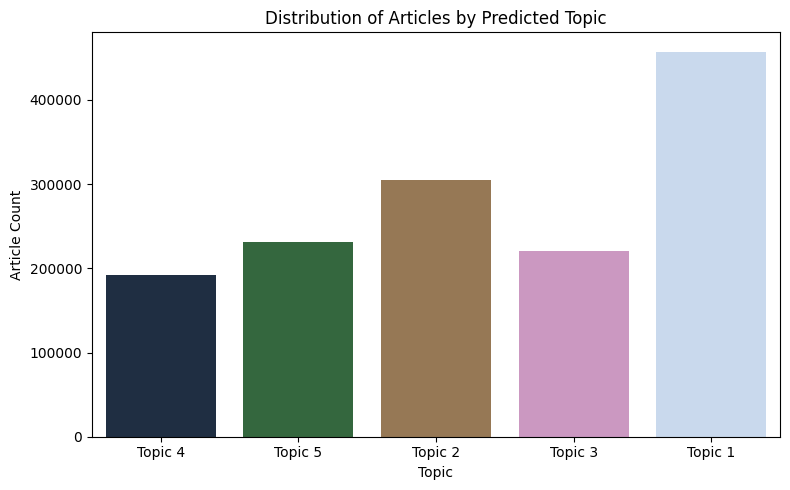

In [219]:

tm = TopicModeler(df, text_col="headline", n_topics=5)
tm.fit()
tm.display_topics()
tm.plot_topic_distribution()

# Get DataFrame with labeled topics
labeled_df = tm.get_labeled_df()

In [246]:
analyzer = TimeSeriesAnalyzer(df, date_col="date")

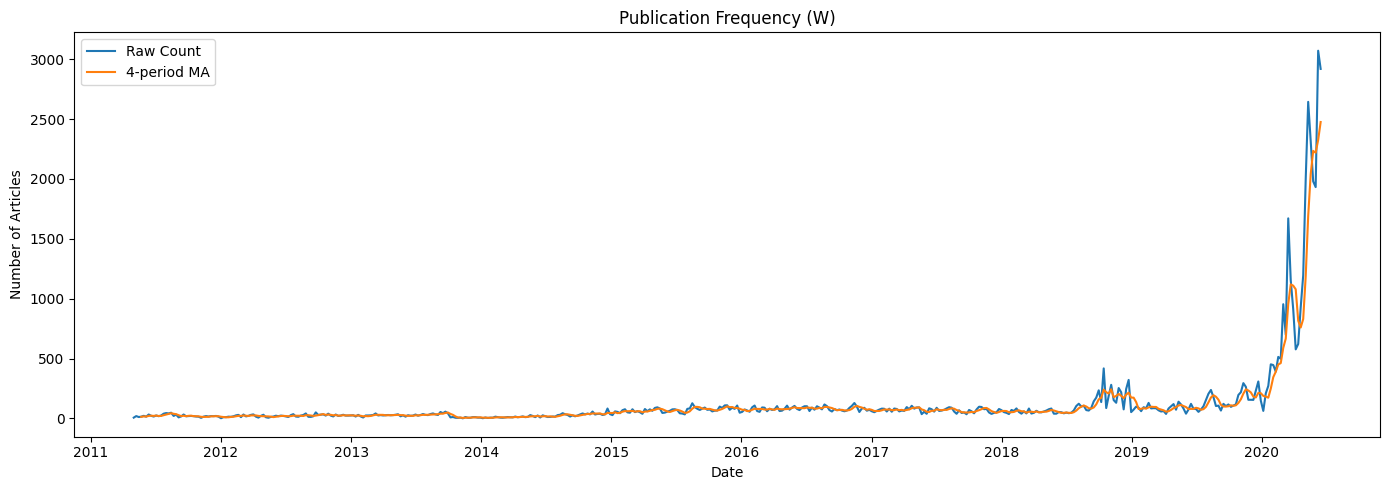

In [247]:
analyzer.plot_publication_trend(freq="W", rolling=4)

In [249]:
spikes = analyzer.detect_spikes(freq="D")

In [252]:
# Display detected spikes
print("\nDetected Spikes:")
print(spikes)


Detected Spikes:
                        date  article_count
0  2020-02-27 00:00:00+00:00            275
1  2020-02-28 00:00:00+00:00            381
2  2020-03-06 00:00:00+00:00            281
3  2020-03-11 00:00:00+00:00            282
4  2020-03-12 00:00:00+00:00            973
5  2020-03-19 00:00:00+00:00            630
6  2020-03-23 00:00:00+00:00            376
7  2020-04-16 00:00:00+00:00            199
8  2020-04-21 00:00:00+00:00            232
9  2020-04-22 00:00:00+00:00            246
10 2020-04-23 00:00:00+00:00            265
11 2020-04-24 00:00:00+00:00            246
12 2020-04-27 00:00:00+00:00            283
13 2020-04-28 00:00:00+00:00            317
14 2020-04-29 00:00:00+00:00            449
15 2020-04-30 00:00:00+00:00            488
16 2020-05-01 00:00:00+00:00            385
17 2020-05-04 00:00:00+00:00            347
18 2020-05-05 00:00:00+00:00            478
19 2020-05-06 00:00:00+00:00            529
20 2020-05-07 00:00:00+00:00            751
21 2020-05-08 

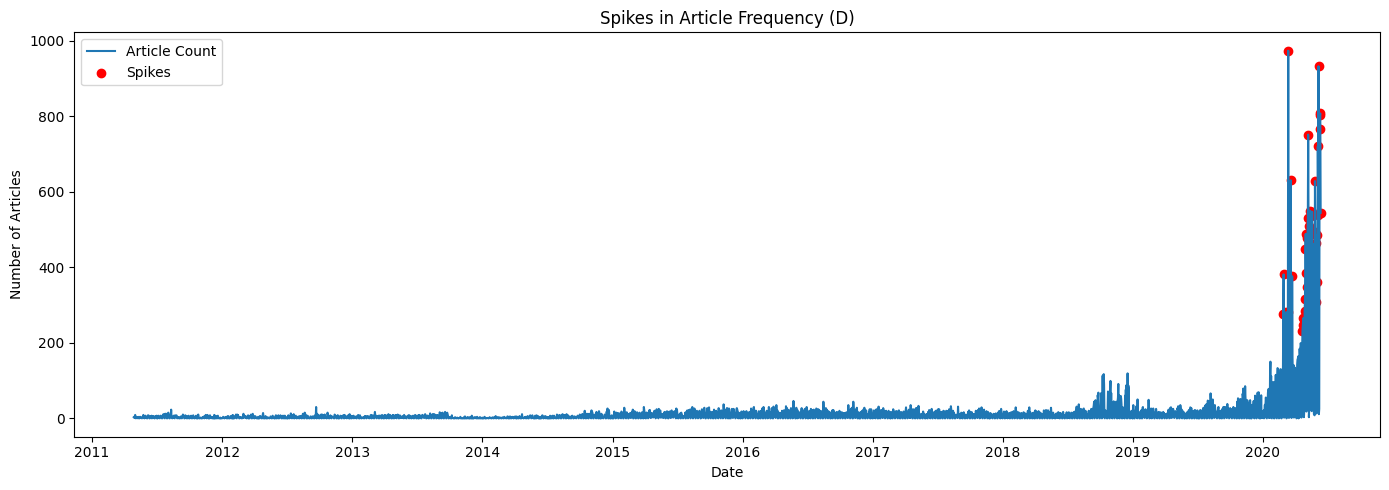

In [251]:
# Plot spikes in publication trend
analyzer.plot_spikes(freq="D", threshold=3.5)

### ✅ Email-like Publisher Names — Extracting Domains


🔹 Analyzing Top Publishers...


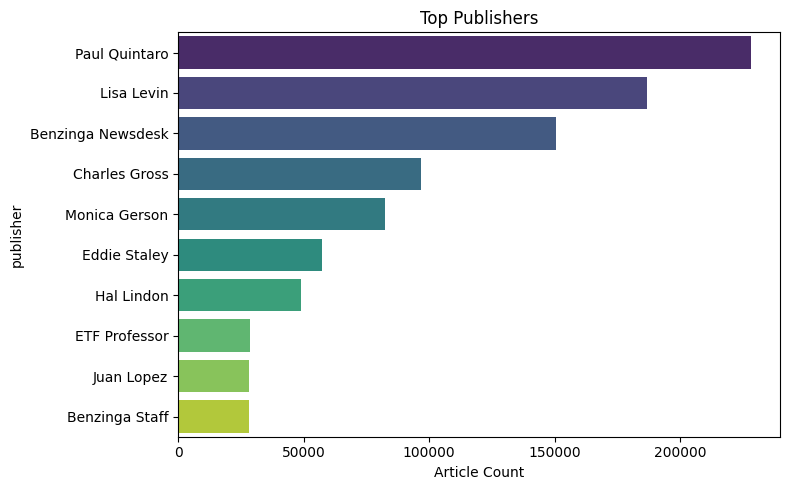


🔹 Analyzing Email Domains...


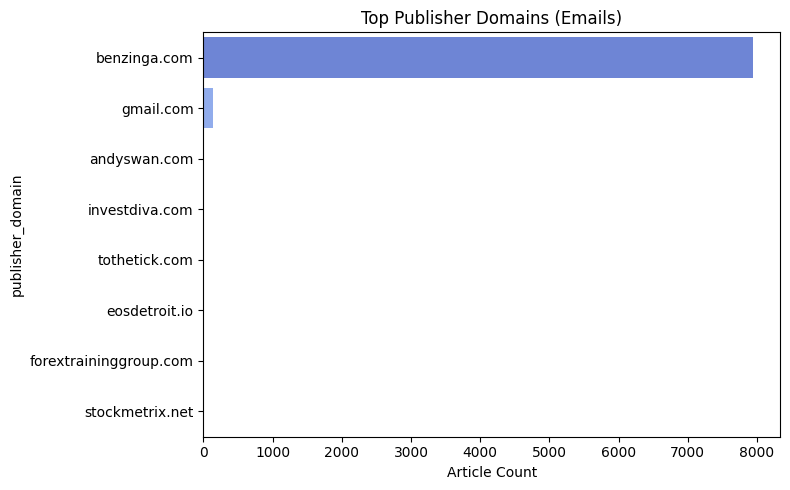


🔹 Analyzing Sentiment by Publisher...
⚠️ Sentiment column not found. Skipping sentiment analysis.


In [ ]:
#Run all analyses: top publishers, domain extraction, and sentiment scores.
analyzer = PublisherAnalyzer(df, publisher_col='publisher', sentiment_col='sentiment_score')
results = analyzer.run_all(top_n=10)
